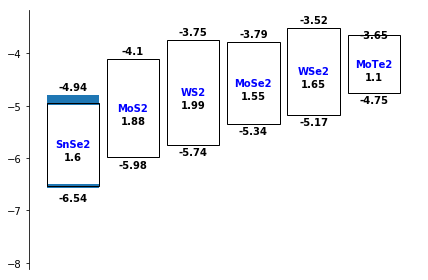

In [6]:
#Code for making energy level plots, borrowed mostly from ()

#For TMDs, see also the paper - 'band engineering

import matplotlib.pyplot as plt
import matplotlib.patches as patches


class semiconductor():
    def __init__(self,IP_exp,IP_low,IP_hi,EA_exp,EA_low,EA_hi, name = None):
        self.IP_exp = IP_exp
        self.IP_low = IP_low
        self.IP_hi = IP_hi
        #if IP_exp == None:
        #    self.IP_exp = (self.IP_hi-self.IP_low)/2
        self.EA_exp = EA_exp
        self.EA_low = EA_low
        self.EA_hi = EA_hi
        #if EA_exp == None:
        #    self.EA_exp = (self.EA_hi-self.EA_low)/2
        self.type = 'semiconductor'
        self.name = name
        

def plot(stack, filepath = "/Users/Mike/Documents/Hot carrier modelling/test.png"):

    band_width_in_x = 1
    space_between_bands = band_width_in_x+0.15
    text_offset = 0.15

    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')

    limits = [] # For some reason annotations are getting cropped and autoscale is not solving this. I use limits to
                # capture the anotation y positions and use them to determine final y axis limits.

    for i, m in enumerate(stack):
        if m.type == 'semiconductor':
            band_width_in_y_exp = m.EA_exp - m.IP_exp
            band_width_in_EA = m.EA_hi-m.EA_low
            band_width_in_IP = m.IP_hi-m.IP_low
            y_EA = m.EA_low
            y_IP = m.IP_low
            y_exp = m.IP_exp
            text_offset_hi = 0.15+(m.EA_hi-m.EA_exp)
            text_offset_low = 0.15+(m.IP_hi-m.IP_low)
            #####
            
        p2 = patches.Rectangle(
            (0.05 + (i * space_between_bands), y_EA),
            band_width_in_x,
            band_width_in_EA,
            fill = True)
        rx, ry = p2.get_xy()
        cx = rx + p2.get_width() / 2.0
        cy = ry + p2.get_height() / 2.0
        ax.add_patch(p2)
        
        p3 = patches.Rectangle(
            (0.05 + (i * space_between_bands), y_IP),
            band_width_in_x,
            band_width_in_IP,
            fill = True)
        rx, ry = p3.get_xy()
        cx = rx + p3.get_width() / 2.0
        cy = ry + p3.get_height() / 2.0
        ax.add_patch(p3)
        
        p1 = patches.Rectangle(
            (0.05 + (i * space_between_bands), y_exp),
            band_width_in_x,
            band_width_in_y_exp,
            fill=False)
        rx, ry = p1.get_xy()
        cx = rx + p1.get_width() / 2.0
        cy = ry + p1.get_height() / 2.0
        ax.add_patch(p1)



        if m.type == 'semiconductor':
            ax.annotate(m.name, (cx, cy), color='b', weight='bold',fontsize=10, ha='center', va='center')
            ax.annotate(m.EA_exp, (cx, cy + p1.get_height() / 2.0 + text_offset_hi), weight='bold', ha='center', va='center', fontsize=10)
            ax.annotate(round(m.EA_exp-m.IP_exp,2), (cx, cy-0.25), weight='bold', ha='center', va='center', fontsize=10)
            limits.extend([cy + p1.get_height() / 2.0 + text_offset_low])
            ax.annotate(m.IP_exp, (cx, cy - p1.get_height() / 2.0 - text_offset_low), weight='bold', ha='center', va='center', fontsize=10)
            limits.extend([cy - p1.get_height() / 2.0 - text_offset_low])
            



    ax.autoscale()
    ax.set_ylim([min(limits)*1.2, max(limits)*.94])
    ax.yaxis.set_ticks_position('left')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.get_xaxis().set_visible(False)
    plt.tight_layout()
    plt.savefig(filepath, dpi= 80)
    plt.show()

if __name__ == "__main__":

    # # stack 1

    SnSe2 = semiconductor(IP_exp = -6.54, IP_low = -6.58, IP_hi = -6.5, EA_exp = -4.94, EA_low = -4.98, EA_hi = -4.8, name = 'SnSe2')
    MoS2 = semiconductor(IP_exp = -5.98, IP_low = -5.98, IP_hi = -5.98, EA_exp = -4.1, EA_low = -4.1, EA_hi = -4.1, name = 'MoS2')
    MoSe2 = semiconductor(IP_exp = -5.34, IP_low = -5.34, IP_hi = -5.34, EA_exp = -3.79, EA_low = -3.79, EA_hi = -3.79, name = 'MoSe2')
    #IP_exp from Keyshar, ACS Nano. EA_exp from bandgap from Guo, robertson
    MoTe2 = semiconductor(IP_exp = -4.75, IP_low = -4.75, IP_hi = -4.75, EA_exp = -3.65, EA_low = -3.81, EA_hi = -3.81, name = 'MoTe2')
    #IP from Kang et al. 'Band offsets and heterostructures..' and experimental 1.1eV gap
    WS2 = semiconductor(IP_exp = -5.74, IP_low = -5.74, IP_hi = -5.74, EA_exp = -3.75, EA_low = -3.75, EA_hi = -3.75, name = 'WS2')
    #IP_exp from Keyshay, bandgap from Guo, robertson
    WSe2 = semiconductor(IP_exp = -5.17, IP_low = -5.17, IP_hi = -5.17, EA_exp = -3.52, EA_low = -3.52, EA_hi = -3.52, name = 'WSe2')
    #Guo, Robertson
    MAPI = semiconductor(IP_exp = -5.98, IP_low = -5.98, IP_hi = -5.98, EA_exp = -4.1, EA_low = -4.1, EA_hi = -4.1, name = 'MoS2')
    PCBM = semiconductor(IP_exp = -5.98, IP_low = -5.98, IP_hi = -5.98, EA_exp = -4.1, EA_low = -4.1, EA_hi = -4.1, name = 'MoS2')
    CdTe_QD = semiconductor(IP_exp = -5.2, IP_low = -5.2, IP_hi = -5.2, EA_exp = -3.6, EA_low = -3.6, EA_hi = -3.6, name = 'CdTe_QD')
    PTB7 = semiconductor(IP_exp = -5.98, IP_low = -5.98, IP_hi = -5.98, EA_exp = -4.1, EA_low = -4.1, EA_hi = -4.1, name = 'MoS2')
    Cu2O = semiconductor(IP_exp = -5.98, IP_low = -5.98, IP_hi = -5.98, EA_exp = -4.1, EA_low = -4.1, EA_hi = -4.1, name = 'MoS2')
    CsPbI3_QD = semiconductor(IP_exp = -5.98, IP_low = -5.98, IP_hi = -5.98, EA_exp = -4.1, EA_low = -4.1, EA_hi = -4.1, name = 'MoS2')
    #Black_Ph = 
    #Alloys possible of MoS2 and MoSe2, assume also for WS2 and WSe2
    
    
    stack = [SnSe2, MoS2,WS2, MoSe2, WSe2,MoTe2]
    plot(stack, filepath = '/Users/Mike/Documents/Hot carrier modelling/Stack1.png')
    
    #read universal bandgap engineering paper properly
    
    

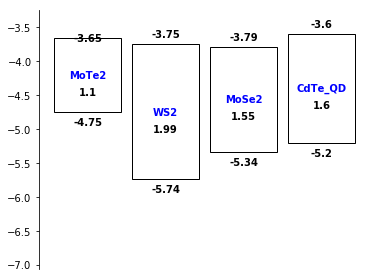

In [7]:
    stack = [MoTe2, WS2,MoSe2,CdTe_QD]
    plot(stack, filepath = '/Users/Mike/Documents/Hot carrier modelling/Stack2.png')
    